In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-drop-out-prediction/train.csv
/kaggle/input/students-drop-out-prediction/test.csv


In [ ]:
#loading the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#loading the data
df = pd.read_csv('../input/students-drop-out-prediction/train.csv')
df.head()

,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40,label
0,0,3,6,11,55,1,1,16,5,60,...,-0.3,0.79,1,93,47,1,48,26,0,1
1,1,8,94,12,65,1,4,22,4,173,...,5.4,6.51,6,29,37,25,53,35,7,2
2,2,3,166,10,155,1,1,16,1,309,...,0.6,2.02,1,8,34,4,43,38,2,1
3,3,3,6,13,121,1,1,16,1,6,...,0.6,2.02,7,37,40,27,43,65,0,1
4,4,4,51,18,21,1,17,22,118,168,...,8.4,12.51,16,22,25,25,24,23,1,1


In [ ]:
#loading the test data
df_test = pd.read_csv('../input/students-drop-out-prediction/test.csv')
df_test.head()

,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
0,0,9,90,15,121,1,8,23,114,256,...,10.8,10.4,6.74,4,96,36,34,23,72,5
1,1,7,123,14,126,1,5,19,3,40,...,19.4,0.5,6.79,15,78,12,25,27,67,12
2,2,3,6,10,102,1,1,16,181,168,...,7.6,2.6,0.32,4,81,47,30,54,23,4
3,3,3,6,10,148,1,1,16,110,278,...,11.1,0.6,2.02,4,100,6,23,12,28,1
4,4,3,6,10,148,1,1,16,1,168,...,7.6,2.6,0.32,7,97,25,30,18,52,0


In [ ]:
df.shape

(3796, 43)

In [ ]:
df_test.shape

(1628, 42)

In [ ]:
##checking null values in train data
df.isnull().sum()

id       0
v_21     0
v_32     0
v_15     0
v_4      0
v_1      0
v_8      0
v_12     0
v_25     0
v_20     0
v_18     0
v_3      0
v_11     0
v_14     0
v_26     0
v_27     0
v_30     0
v_9      0
v_31     0
v_28     0
v_13     0
v_33     0
v_17     0
v_19     0
v_29     0
v_23     0
v_24     0
v_10     0
v_5      0
v_6      0
v_22     0
v_0      0
v_7      0
v_2      0
v_16     0
v_34     0
v_35     0
v_36     0
v_37     0
v_38     0
v_39     0
v_40     0
label    0
dtype: int64

In [ ]:
#checking null values in test data
df_test.isnull().sum()

id      0
v_21    0
v_32    0
v_15    0
v_4     0
v_1     0
v_8     0
v_12    0
v_25    0
v_20    0
v_18    0
v_3     0
v_11    0
v_14    0
v_26    0
v_27    0
v_30    0
v_9     0
v_31    0
v_28    0
v_13    0
v_33    0
v_17    0
v_19    0
v_29    0
v_23    0
v_24    0
v_10    0
v_5     0
v_6     0
v_22    0
v_0     0
v_7     0
v_2     0
v_16    0
v_34    0
v_35    0
v_36    0
v_37    0
v_38    0
v_39    0
v_40    0
dtype: int64

In [ ]:
#statistics of train data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,3796.0,1897.500000,1095.955139,0.00,948.75,1897.50,2846.25,3795.00
v_21,3796.0,4.817439,6.166860,3.00,3.00,3.00,4.00,61.00
v_32,3796.0,70.825606,56.110329,6.00,6.00,89.00,116.00,176.00
v_15,3796.0,11.609062,2.576362,9.00,10.00,10.00,12.00,25.00
v_4,3796.0,99.329294,45.017380,9.00,55.00,101.00,146.00,176.00
v_1,3796.0,0.911486,0.284079,0.00,1.00,1.00,1.00,1.00
v_8,3796.0,3.436249,4.577644,1.00,1.00,1.00,3.00,25.00
v_12,3796.0,18.970495,15.010042,16.00,16.00,16.00,16.00,179.00
v_25,3796.0,97.203372,79.213308,1.00,5.00,110.00,181.00,289.00
v_20,3796.0,166.138567,103.121322,6.00,60.00,168.00,251.00,322.00


In [ ]:
#statistics of test data
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,1628.0,813.500000,470.107435,0.00,406.75,813.50,1220.25,1627.00
v_21,1628.0,4.893735,6.354640,3.00,3.00,3.00,4.00,65.00
v_32,1628.0,71.097666,56.517483,6.00,6.00,89.00,116.00,176.00
v_15,1628.0,11.465602,2.408124,10.00,10.00,10.00,12.00,22.00
v_4,1628.0,102.058968,44.984573,9.00,59.00,102.00,148.00,176.00
v_1,1628.0,0.903563,0.295281,0.00,1.00,1.00,1.00,1.00
v_8,1628.0,3.299754,4.469780,1.00,1.00,1.00,3.00,24.00
v_12,1628.0,19.086609,15.406055,16.00,16.00,16.00,16.00,172.00
v_25,1628.0,96.767199,78.752500,1.00,5.00,110.00,181.00,274.00
v_20,1628.0,171.600737,103.368968,6.00,60.00,175.00,251.00,324.00


In [ ]:
#defining all the features
categories_dict = {'v_1': 'Binary', 'v_26': 'Binary', 'v_11': 'Binary', 'v_14': 'Binary',
                   'v_30': 'Binary', 'v_28': 'Binary', 'v_9': 'Binary', 'v_27': 'Binary',
                   'v_32': 'Nominal', 'v_4': 'Nominal', 'v_3': 'Nominal', 'v_20': 'Nominal',
                   'v_21': 'Nominal', 'v_18': 'Nominal', 'v_25': 'Nominal', 'v_12': 'Nominal', 
                   'v_31': 'Ordinal', 'v_15': 'Ordinal', 'v_19': 'Ordinal', 'v_13': 'Ordinal',
                   'v_33': 'Ordinal', 'v_17': 'Ordinal', 'v_29': 'Ordinal', 'v_23': 'Ordinal',
                   'v_6': 'Ordinal', 'v_24': 'Ordinal', 'v_10': 'Ordinal', 'v_5': 'Ordinal',
                   'v_22': 'Ordinal', 'v_0': 'Ordinal', 'v_16': 'Ratio', 'v_2': 'Ratio', 'v_8': 'Ratio',
                   'v_7': 'Ratio', 'v_34': 'Ratio', 'v_35': 'Ratio', 'v_36': 'Ratio', 'v_37': 'Ratio', 
                   'v_38': 'Ratio', 'v_39': 'Ratio', 'v_40': 'Ratio'}

In [ ]:
#all the columns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

nominal_columns = [column for column in df.columns if column in categories_dict and categories_dict[column] == 'Nominal']
ordinal_columns = [column for column in df.columns if column in categories_dict and categories_dict[column] == 'Ordinal']
ratio_columns = [column for column in df.columns if column in categories_dict and categories_dict[column] == 'Ratio']
binary_columns = [column for column in df.columns if column in categories_dict and categories_dict[column] == 'Binary']


<AxesSubplot:ylabel='Density'>

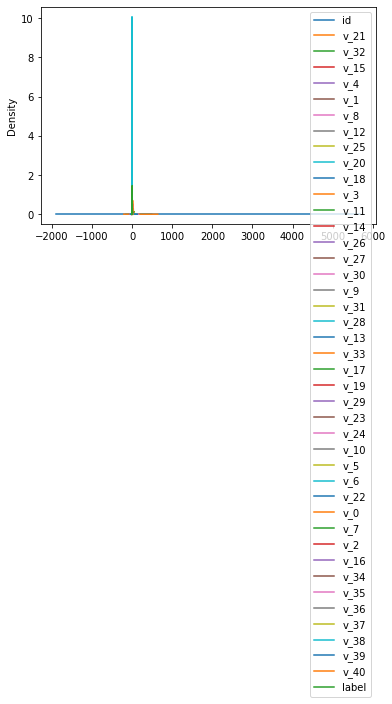

In [ ]:
#kde plot for all the columns of train data
df.plot.kde()

<AxesSubplot:ylabel='Density'>

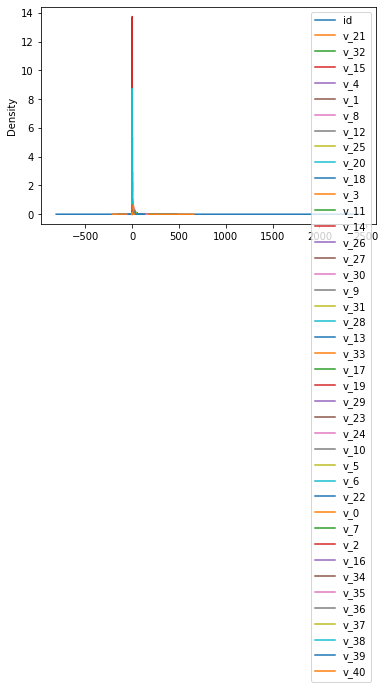

In [ ]:
#kde plot for all the columns of test data
df_test.plot.kde()

#scales for all the features are different. So, performing scaling on ordinal,ratio and nominal features.
#Tried OHE on the nominal features too, but that is not giving a good accuracy. 
#so performing Standard Scaler on the  ordinal,ratio and nominal features.

In [ ]:
#scaling on train set
scaler = StandardScaler()
ordinal_ratio_columns = np.hstack((df[ordinal_columns].values, df[ratio_columns].values, df[nominal_columns].values))
scaler.fit(ordinal_ratio_columns)
scaled_ordinal_ratio_columns = scaler.transform(ordinal_ratio_columns)

complete_df = np.hstack((df[binary_columns].values, scaled_ordinal_ratio_columns)) 

In [ ]:
#scaling on test set
ordinal_ratio_columns_test = np.hstack((df_test[ordinal_columns].values, df_test[ratio_columns].values, df_test[nominal_columns].values))
scaled_ordinal_ratio_columns_test = scaler.transform(ordinal_ratio_columns_test)
complete_df_test = np.hstack((df_test[binary_columns].values, scaled_ordinal_ratio_columns_test)) 

In [ ]:
#separating the labels from train file
X = complete_df
y = df.iloc[:, -1].values

X_test = complete_df_test

In [ ]:
#shape of X defined
X.shape

(3796, 41)

In [ ]:
#shape of X_test defined
X_test.shape

(1628, 41)

sanity check. Both the train and test set have same no. of columns/features.

In [ ]:
#Using Logistic Regression as Baseline model
#Performing cross validation for checking metrics
#F1_score(micro) is being used as a metric due to imbalance of classes.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf_logit = LogisticRegression()
cvs = cross_val_score(clf_logit, X, y, cv = 5,scoring='f1_micro')
cvs

In [ ]:
#printing confusion matrix
#from sklearn.metrics import confusion_matrix
clf_logit.fit(X,y)
y_pred = clf_logit.predict(X)

print(confusion_matrix(y, y_pred))

The model is poorly predicting class 2 specifically.
Tried with different C values, but didn't work well.



In [ ]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
cvs = cross_val_score(clf_knn, X, y, cv = 5,scoring='f1_micro')
cvs

In [ ]:
#Using LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda= LinearDiscriminantAnalysis()
cvs = cross_val_score(clf_lda, X, y, cv = 5,scoring='f1_micro')
cvs

In [ ]:
#DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=126)
cvs = cross_val_score(clf_dt, X, y, cv = 5, scoring='f1_micro')
cvs

In [ ]:
clf_dt.fit(X,y)
y_pred = clf_dt.predict(X)

print(confusion_matrix(y, y_pred))

In [ ]:
#Hyperparameter search for decision tree model
from sklearn.model_selection import GridSearchCV
decisiontreeclassifier_model = GridSearchCV(clf_dt,
                      {'criterion':['entropy', 'gini'],
                          'splitter':['random','best'],
                      'min_samples_leaf':[2,4,6,8,10],
                         'max_depth':[3,4,5,6]
                          } ,
                        cv = 5, 
                      return_train_score = True)

In [ ]:
decisiontreeclassifier_model.fit(X, y)
print(decisiontreeclassifier_model.best_params_)

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=126,criterion='gini', max_depth=5,min_samples_leaf=2, splitter='best')
cvs = cross_val_score(clf_dt, X, y, cv = 5, scoring='f1_micro')
cvs

In [ ]:
#Random Forest Classifer model
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=126, criterion='gini',n_estimators=100, max_depth=6, min_samples_leaf=2,max_features='sqrt')
cvs = cross_val_score(clf_rf, X, y, cv = 5,scoring='f1_micro')
cvs

In [ ]:
clf_rf.fit(X,y)
y_pred = clf_rf.predict(X)

print(confusion_matrix(y, y_pred))

In [ ]:
#HPT for RFC model
rfc_model= GridSearchCV(clf_rf,{'n_estimators':[100,200,300,400],'criterion':['entropy', 'gini'],
                          
                        'min_samples_leaf':[2,4,6,8,10],
                          'max_depth':[3,4,5,6], 'max_features':['sqrt','log2']
                          },
                     cv = 5, 
                        return_train_score = True)

In [ ]:
rfc_model.fit(X, y)
print(rfc_model.best_params_)

In [ ]:
#Next model is Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
model1 = AdaBoostClassifier(random_state = 1)
model1.fit(X, y)
cvs = cross_val_score(model1, X, y, cv = 5,scoring='f1_micro')
cvs


In [ ]:
model1.fit(X,y)
y_pred = model1.predict(X)

print(confusion_matrix(y, y_pred))

In [ ]:
#support vector machine model
from sklearn.svm import SVC
clf_svm = SVC(gamma='scale',decision_function_shape='ovo',C=1.0)
cvs = cross_val_score(clf_svm, X, y, cv = 5,scoring='f1_micro')
cvs
print("Mean score of %0.2f with a standard deviation of %0.2f" % (cvs.mean(), cvs.std()))

In [ ]:
clf_svm.fit(X,y)
y_pred = clf_svm.predict(X)

print(confusion_matrix(y, y_pred))

In [ ]:
#Gradient boosting classifier method
from sklearn.ensemble import GradientBoostingClassifier
clf_gbc = GradientBoostingClassifier()
clf_gbc.fit(X,y)

In [ ]:
cvs = cross_val_score(clf_gbc, X, y, cv = 5, scoring='f1_micro')
cvs

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred= clf_gbc.predict(X)
cm= confusion_matrix(y, y_pred)
cm

In [ ]:
#hyperparameter tuning for gradient boosting model
from sklearn.model_selection import GridSearchCV
gb_model= GridSearchCV(clf_gbc,
                        {'learning_rate':[0.1,0.01,0.001,1.0],
                           'max_depth':[3,4,5,6],'n_estimators':[100,200,150,300], 'min_samples_split':[2,3,4]
                          } ,
                        cv = 5, 
                        return_train_score = True)

In [ ]:
gb_model.fit(X,y)
gb_model.best_params_


In [ ]:
#manually putting the values of best parameters
clf_gbc = GradientBoostingClassifier(learning_rate=0.1, max_depth=4,  n_estimators=200, random_state = 50,criterion='squared_error')
clf_gbc.fit(X,y)
cvs = cross_val_score(clf_gbc, X,y, cv = 5, scoring='f1_micro')
cvs

In [ ]:
y_pred= clf_gbc.predict(X)
cm= confusion_matrix(y, y_pred)
cm

In [ ]:
#XGBoost model
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
xgb_model =XGBClassifier( random_state=42, max_depth=6, n_estimators=100,learning_rate=0.1)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))

In [ ]:
cvs = cross_val_score(xgb_model, X, y, cv = 5, scoring='f1_micro')
cvs

After using many models with hyperparameter tuning Light gradient boosting machine seems to apply best results till now.

In [ ]:
#Light gradient boosting machine model
#These parameters are used via calculating best parameters using GridSearchCV
#manually putting the parameters in the model defined
from lightgbm import LGBMClassifier
clf_lgbm= LGBMClassifier(boosting_type= 'gbdt',max_depth=5, min_child_samples=20, n_estimators=300, random_state=42)
clf_lgbm.fit(X,y)

LGBMClassifier(max_depth=5, n_estimators=300, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(clf_lgbm, X, y, cv = 5, scoring='f1_micro')

cvs

array([0.75921053, 0.74703557, 0.7312253 , 0.74703557, 0.74044796])

In [ ]:
#predicting values for train set
y_pred= clf_lgbm.predict(X)
cm= confusion_matrix(y, y_pred)
cm

array([[1241,    2,    0],
       [   0, 1863,    0],
       [   0,    3,  687]])

In [ ]:
#predicting values for test set
pred= clf_lgbm.predict(X_test)
pred

array([1, 2, 2, ..., 0, 2, 2])

In [ ]:
# generating a submission file 
ds = np.arange(0, pred.shape[0])
output = pd.DataFrame({'id':ds, 'label': pred})
output.to_csv('submission.csv',index=False)

In [ ]:
#class wise predicted labels 
output.label.value_counts()

1    923
0    489
2    216
Name: label, dtype: int64

Best F1_micro score is 0.76119 using Light GBM Classifier with hyperparameter tuning.